# Pandas I
Sean Wade

In [1]:
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
%matplotlib inline

## Problem 1

In [3]:
print pd.Series(-3, np.arange(1,6))
print '\n----------------\n'
print pd.Series({'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26})

1   -3
2   -3
3   -3
4   -3
5   -3
dtype: int64

----------------

Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64


## Problem 2

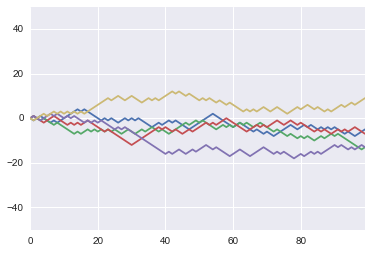

In [4]:
N = 100
for _ in xrange(5):
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1
    s = pd.Series(s)
    s = s.cumsum()
    plt.ylim([-50, 50])
    s.plot()
plt.show()

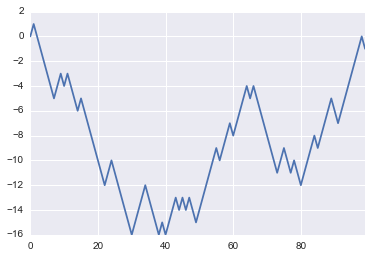

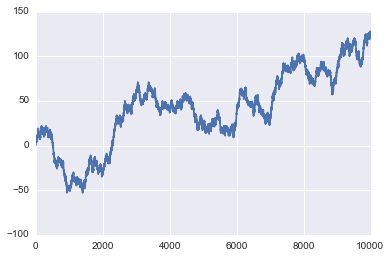

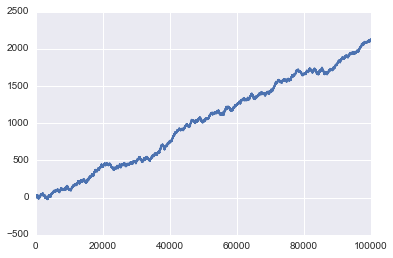

In [5]:
for N in map(int, [1e2, 1e4, 1e5]):
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1
    s = pd.Series(s)
    s = s.cumsum()
    s.plot()
    plt.show()

## Problem 3

In [6]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [7]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 5 columns):
Age      9 non-null int64
Class    9 non-null object
ID       9 non-null int64
Name     9 non-null object
Sex      9 non-null object
dtypes: int64(2), object(3)
memory usage: 432.0+ bytes


In [8]:
otherInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 3 columns):
Financial_Aid    9 non-null object
GPA              9 non-null float64
ID               9 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 288.0+ bytes


In [9]:
mathInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 3 columns):
Grade         5 non-null float64
ID            5 non-null int64
Math_Major    5 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [10]:
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


## Problem 4

In [11]:
pd.merge(studentInfo[studentInfo['Sex'] == 'M'], otherInfo, )[['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


## Problem 5

**Import Crime Data**

In [12]:
data = pd.read_csv('crime_data.txt', header=1, index_col=0)
data.head()

,Population,Total,Violent,Property,Murder,Forcible-Rape,Robbery,Aggravated-assault,Burglary,Larcency-Theft,Vehicle-Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


**Add "Crime_Rate" Column to the data Frame**

In [37]:
data['Crime_Rate'] = data['Total'] / data['Population']
data.tail()

,Population,Total,Violent,Property,Murder,Forcible-Rape,Robbery,Aggravated-assault,Burglary,Larcency-Theft,Vehicle-Theft,Crime_Rate
Year,,,,,,,,,,,,
2008,304374846,11160543,1392628,9767915,16442,90479,443574,842134,2228474,6588046,958629,0.036667
2009,307006550,10762956,1325896,9337060,15399,89241,408742,812514,2203313,6338095,795652,0.035058
2010,309330219,10363873,1251248,9112625,14772,85593,369089,781844,2168457,6204601,739565,0.033504
2011,311587816,10258774,1206031,9052743,14661,84175,354772,752423,2185140,6151095,716508,0.032924
2012,313914040,10189902,1214464,8975438,14827,84376,354522,760739,2103787,6150598,721053,0.032461


**Plot Crime Rate as a function of Year**

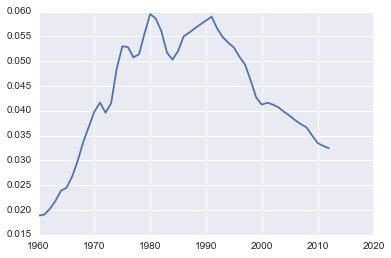

In [14]:
plt.plot(data.index, data['Crime_Rate'])

**List 5 years with highest crime rate in descending order**

In [30]:
list(data.sort('Crime_Rate',ascending=False).index[:5])

[1980, 1991, 1981, 1990, 1989]

**Calculate average number of total crimes as well as burglary crimes between 1960 and 2012**

In [40]:
avg_total = data['Total'].mean()
avg_burglary = data['Burglary'].mean()
print "Avg Total: {}".format(avg_total)
print "Avg Burglary: {}".format(avg_burglary)

Avg Total: 10638068.0755
Avg Burglary: 2446286.20755


**Find the years for which the total number of crimes was above average and the years for which it was below average**

In [44]:
len(data[data['Total'] > avg_total])

35

**Plot number of murders as a function of the population**

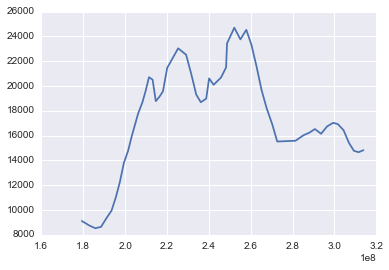

In [45]:
plt.plot(data['Population'], data['Murder'])

**Select Population, Violent, and Robbery columns for all years in the 1980's and save this subset to the file "crime_subset.txt"**

In [68]:
data.loc[1980:1989][['Population', 'Violent', 'Robbery']]

,Population,Violent,Robbery
Year,,,
1980,225349264,1344520,565840
1981,229146000,1361820,592910
1982,231534000,1322390,553130
1983,233981000,1258090,506570
1984,236158000,1273280,485010
1985,238740000,1328800,497870
1986,240132887,1489169,542775
1987,242282918,1483999,517704
1988,245807000,1566220,542970


In [69]:
results = data.loc[1980:1989][['Population', 'Violent', 'Robbery']]
results.to_csv("crime_subset.txt")